In [5]:
%matplotlib inline
import pandas as pd

In [6]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [7]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
2,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
3,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
4,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN


In [8]:
release_dates = pd.DataFrame.from_csv('data/release_dates.csv', index_col=None,
                                      parse_dates=['date'], infer_datetime_format=True)
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#Beings,2015,Romania,2015-01-29
2,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21
3,#Horror,2015,USA,2015-11-20
4,#Horror,2015,UK,2016-05-16


### Make a bar plot of the months in which movies with "Christmas" in their title tend to be released in the USA.

In [9]:
r = release_dates
r.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#Beings,2015,Romania,2015-01-29
2,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21
3,#Horror,2015,USA,2015-11-20
4,#Horror,2015,UK,2016-05-16


In [15]:
rd = r[(r.title.str.contains('Christmas')) & (r.country == 'USA')]
rd.head()

,title,year,country,date
1124,12 Dog Days of Christmas,2014,USA,2014-11-28
1125,12 Dogs of Christmas: Great Puppy Rescue,2012,USA,2012-10-09
5688,A Belle for Christmas,2014,USA,2014-11-04
5931,A Cadaver Christmas,2011,USA,2011-04-02
6035,A Christmas Blessing,2013,USA,2013-12-07


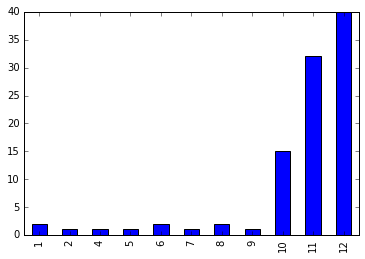

In [19]:
rd.date.dt.month.value_counts().sort_index().plot(kind = 'bar')

### Make a bar plot of the months in which movies whose titles start with "The Hobbit" are released in the USA.

In [20]:
rd = r[(r.title.str.startswith('The Hobbit')) & (r.country == 'USA')]
rd.head()

,title,year,country,date
350227,The Hobbit: An Unexpected Journey,2012,USA,2012-12-14
350292,The Hobbit: The Battle of the Five Armies,2014,USA,2014-12-17
350361,The Hobbit: The Desolation of Smaug,2013,USA,2013-12-13


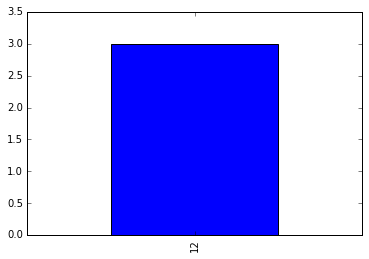

In [22]:
rd.date.dt.month.value_counts().sort_index().plot(ylim = (0,3.5), kind = 'bar')

### Make a bar plot of the day of the week on which movies with "Romance" in their title tend to be released in the USA.

In [23]:
rd = r[(r.title.str.contains('Romance')) & (r.country == 'USA')]
rd.head()

,title,year,country,date
863,100% OFF: A Recession-Era Romance,2012,USA,2012-07-04
5939,A California Romance,1922,USA,1922-12-24
6172,A Circus Romance,1916,USA,1916-01-24
6301,A Crooked Romance,1917,USA,1917-09-30
6312,A Cumberland Romance,1920,USA,1920-08-06


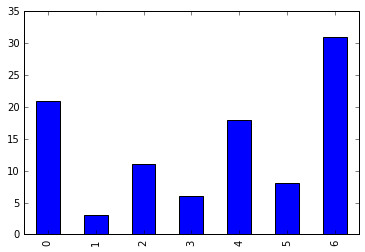

In [24]:
rd.date.dt.dayofweek.value_counts().sort_index().plot(kind = 'bar')

### Make a bar plot of the day of the week on which movies with "Action" in their title tend to be released in the USA.

In [25]:
rd = r[(r.title.str.contains('Action')) & (r.country == 'USA')]
rd.head()

,title,year,country,date
6175,A Civil Action,1998,USA,1999-01-08
8127,A Man of Action,1923,USA,1923-06-03
12611,Ace of Action,1926,USA,1926-11-28
12856,Action,1921,USA,1921-09-12
12862,Action Galore,1925,USA,1925-11-03


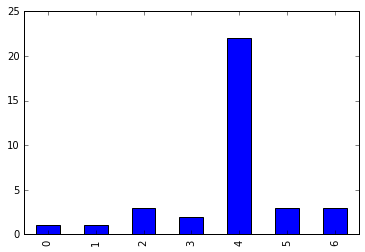

In [26]:
rd.date.dt.dayofweek.value_counts().sort_index().plot(kind = 'bar')

### On which date was each Judi Dench movie from the 1990s released in the USA?

In [29]:
c = cast
r.head()
c.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
2,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
3,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
4,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN


In [31]:
jdr = c[(c.name == 'Judi Dench') & (c.year // 10 == 199)]
jdr

,title,year,name,type,character,n
2604438,GoldenEye,1995,Judi Dench,actress,M,6.0
2604439,Hamlet,1996,Judi Dench,actress,Hecuba,12.0
2604445,Jack & Sarah,1995,Judi Dench,actress,Margaret,3.0
2604451,Mrs Brown,1997,Judi Dench,actress,Queen Victoria,1.0
2604463,Shakespeare in Love,1998,Judi Dench,actress,Queen Elizabeth,12.0
2604467,Tea with Mussolini,1999,Judi Dench,actress,Arabella,2.0
2604475,The World Is Not Enough,1999,Judi Dench,actress,M,6.0
2604476,Tomorrow Never Dies,1997,Judi Dench,actress,M,9.0


In [33]:
jdm = jdr.merge(r)
jdm.head()

,title,year,name,type,character,n,country,date
0,GoldenEye,1995,Judi Dench,actress,M,6.0,Canada,1995-11-16
1,GoldenEye,1995,Judi Dench,actress,M,6.0,USA,1995-11-17
2,GoldenEye,1995,Judi Dench,actress,M,6.0,Ireland,1995-11-24
3,GoldenEye,1995,Judi Dench,actress,M,6.0,Poland,1995-11-24
4,GoldenEye,1995,Judi Dench,actress,M,6.0,UK,1995-11-24


In [38]:
jdm[jdm.country == 'USA'].sort_values('date')

,title,year,name,type,character,n,country,date
1,GoldenEye,1995,Judi Dench,actress,M,6.0,USA,1995-11-17
71,Jack & Sarah,1995,Judi Dench,actress,Margaret,3.0,USA,1996-03-22
40,Hamlet,1996,Judi Dench,actress,Hecuba,12.0,USA,1996-12-25
78,Mrs Brown,1997,Judi Dench,actress,Queen Victoria,1.0,USA,1997-10-03
246,Tomorrow Never Dies,1997,Judi Dench,actress,M,9.0,USA,1997-12-19
101,Shakespeare in Love,1998,Judi Dench,actress,Queen Elizabeth,12.0,USA,1999-01-08
147,Tea with Mussolini,1999,Judi Dench,actress,Arabella,2.0,USA,1999-05-14
173,The World Is Not Enough,1999,Judi Dench,actress,M,6.0,USA,1999-11-19


### In which months do films with Judi Dench tend to be released in the USA?

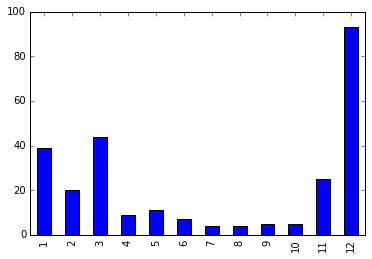

In [44]:
jdm.date.dt.month.value_counts().sort_index().plot(kind = 'bar')

### In which months do films with Tom Cruise tend to be released in the USA?

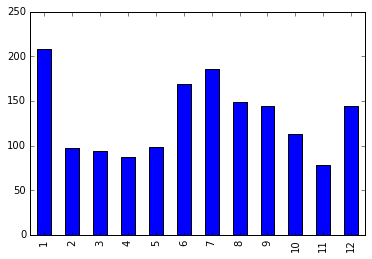

In [46]:
tcr = c[c.name == 'Tom Cruise']

tcm = tcr.merge(r)
tcm[tcm.country == 'USA'].sort_values('date')
tcm.date.dt.month.value_counts().sort_index().plot(kind = 'bar')